In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime
import holidays

In [3]:
data_dir = '/content/drive/My Drive/MIE498 Thesis/0_Data'

#2017

In [14]:
# Read in data
data_2017Q1 = pd.read_csv("{}/bikeshare2017/Bikeshare Ridership (2017 Q1).csv".format(data_dir), header=0)
data_2017Q2 = pd.read_csv("{}/bikeshare2017/Bikeshare Ridership (2017 Q2).csv".format(data_dir), header=0)
data_2017Q3 = pd.read_csv("{}/bikeshare2017/Bikeshare Ridership (2017 Q3).csv".format(data_dir), header=0)
data_2017Q4 = pd.read_csv("{}/bikeshare2017/Bikeshare Ridership (2017 Q4).csv".format(data_dir), header=0)

In [15]:
print(list(data_2017Q1.columns))
print(list(data_2017Q2.columns))
print(list(data_2017Q3.columns))
print(list(data_2017Q4.columns))

['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_name', 'to_station_name', 'user_type']
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_name', 'to_station_name', 'user_type']


In [ ]:
# Join DataFrames
data_2017_all = pd.concat([data_2017Q1, data_2017Q2, data_2017Q3, data_2017Q4])

print(data_2017_all.shape)
data_2017_all.head() # No bike id info...

In [6]:
data_2017_all['user_type'].unique()

array(['Member', 'Casual'], dtype=object)

In [7]:
# Reorder columns
data_2017_all = pd.concat([data_2017_all.iloc[:, 0], data_2017_all.iloc[:, 3], data_2017_all.iloc[:, 1], data_2017_all.iloc[:, 4], data_2017_all.iloc[:, 4:6], data_2017_all.iloc[:, 2], data_2017_all.iloc[:, 7:9]], axis=1)
# Rename columns
column_names = ['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']
data_2017_all.columns = column_names

print(data_2017_all.shape)
data_2017_all.head()

(1492369, 9)


,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,712382,223,1/1/2017 0:00,7051.0,7051.0,Wellesley St E / Yonge St Green P,1/1/2017 0:03,Church St / Wood St,Member
1,712383,279,1/1/2017 0:00,7143.0,7143.0,Kendal Ave / Bernard Ave,1/1/2017 0:05,Bathurst Subway Station,Member
2,712384,1394,1/1/2017 0:05,7113.0,7113.0,Parliament St / Aberdeen Ave,1/1/2017 0:29,College St W / Markham St,Member
3,712385,826,1/1/2017 0:07,7077.0,7077.0,College Park South,1/1/2017 0:21,King St W / Spadina Ave,Member
4,712386,279,1/1/2017 0:08,7079.0,7079.0,McGill St / Church St,1/1/2017 0:12,University Ave / Gerrard St W,Member


In [8]:
data_2017_all.dtypes

Trip Id                 int64
Trip Duration           int64
Start Station Id       object
Start Time            float64
Start Station Name    float64
End Station Id         object
End Time               object
End Station Name       object
User Type              object
dtype: object

# 2018

In [16]:
# Read in data
data_2018Q1 = pd.read_csv("{}/bikeshare2018/Bike Share Toronto Ridership_Q1 2018.csv".format(data_dir), header=0)
data_2018Q2 = pd.read_csv("{}/bikeshare2018/Bike Share Toronto Ridership_Q2 2018.csv".format(data_dir), header=0)
data_2018Q3 = pd.read_csv("{}/bikeshare2018/Bike Share Toronto Ridership_Q3 2018.csv".format(data_dir), header=0)
data_2018Q4 = pd.read_csv("{}/bikeshare2018/Bike Share Toronto Ridership_Q4 2018.csv".format(data_dir), header=0)

In [17]:
print(list(data_2018Q1.columns))
print(list(data_2018Q2.columns))
print(list(data_2018Q3.columns))
print(list(data_2018Q4.columns))

['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']


In [20]:
# Join DataFrames
data_2018_all = pd.concat([data_2018Q1, data_2018Q2, data_2018Q3, data_2018Q4])

print(data_2018_all.shape)
data_2018_all.head() # No bike id info...

(1922955, 9)


,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,1/1/2018 0:54,7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,1/1/2018 1:03,7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,1/1/2018 0:59,7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),1/1/2018 1:16,7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,1/1/2018 1:12,7060,Princess St / Adelaide St E,Annual Member


In [21]:
data_2018_all['user_type'].unique()

array(['Annual Member', 'Casual Member'], dtype=object)

In [22]:
# Reorder columns
data_2018_all = pd.concat([data_2018_all.iloc[:, 0:5], data_2018_all.iloc[:, 6], data_2018_all.iloc[:, 5], data_2018_all.iloc[:, 7], data_2018_all.iloc[:, 8]], axis=1)
print(data_2018_all.shape)
data_2018_all.head()

(1922955, 9)


,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,to_station_id,trip_stop_time,to_station_name,user_type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,7176,1/1/2018 0:54,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,7191,1/1/2018 1:03,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,7021,1/1/2018 0:59,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),7020,1/1/2018 1:16,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,7060,1/1/2018 1:12,Princess St / Adelaide St E,Annual Member


In [23]:
# Rename columns
column_names = ['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']
data_2018_all.columns = column_names
data_2018_all.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,2383648,393,7018,1/1/2018 0:47,Bremner Blvd / Rees St,7176,1/1/2018 0:54,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,1/1/2018 0:52,Ossington Ave / College St,7191,1/1/2018 1:03,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,1/1/2018 0:55,Bay St / College St (West Side) - SMART,7021,1/1/2018 0:59,Bay St / Albert St,Annual Member
3,2383651,1138,7202,1/1/2018 0:57,Queen St W / York St (City Hall),7020,1/1/2018 1:16,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,1/1/2018 1:00,University Ave / Elm St,7060,1/1/2018 1:12,Princess St / Adelaide St E,Annual Member


In [24]:
data_2018_all.dtypes

Trip Id                int64
Trip Duration          int64
Start Station Id       int64
Start Time            object
Start Station Name    object
End Station Id         int64
End Time              object
End Station Name      object
User Type             object
dtype: object

# 2019

In [160]:
# Read in data
data_2019Q1 = pd.read_csv("{}/bikeshare2019/2019-Q1.csv".format(data_dir), header=0)
data_2019Q2 = pd.read_csv("{}/bikeshare2019/2019-Q2.csv".format(data_dir), header=0)
data_2019Q3 = pd.read_csv("{}/bikeshare2019/2019-Q3.csv".format(data_dir), header=0)
data_2019Q4 = pd.read_csv("{}/bikeshare2019/2019-Q4.csv".format(data_dir), header=0)

In [161]:
print(list(data_2019Q1.columns))
print(list(data_2019Q2.columns))
print(list(data_2019Q3.columns))
print(list(data_2019Q4.columns))

['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']


In [162]:
data_2019Q1.isnull().sum()

Trip Id               0
Trip  Duration        7
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64

In [163]:
data_2019Q2.isnull().sum()

Trip Id               0
Trip  Duration        4
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        1
End Time              0
End Station Name      1
Bike Id               0
User Type             0
dtype: int64

In [166]:
data_2019Q3.isnull().sum()

Trip Id                0
Trip  Duration         3
Start Station Id       0
Start Time             0
Start Station Name     0
End Station Id        19
End Time               0
End Station Name      19
Bike Id                0
User Type              0
dtype: int64

In [165]:
data_2019Q4.isnull().sum()

Trip Id                 0
Trip  Duration          2
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        434
End Time                0
End Station Name      434
Bike Id                 0
User Type               0
dtype: int64

In [27]:
# Join DataFrames
data_2019_all = pd.concat([data_2019Q1, data_2019Q2, data_2019Q3, data_2019Q4])

print(data_2019_all.shape)
data_2019_all.head()

(2439517, 10)


,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member
1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member
2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member
3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member
4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member


In [28]:
data_2019_all['User Type'].unique()

array(['Annual Member', 'Casual Member'], dtype=object)

In [17]:
# Reorder columns
data_2019_all = pd.concat([data_2019_all.iloc[:, 0:8], data_2019_all.iloc[:, 9], data_2019_all.iloc[:, 8]], axis=1)
# Rename columns
column_names = ['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type', 'Bike Id']
data_2019_all.columns = column_names

print(data_2019_all.shape)
data_2019_all.head()

(2439517, 10)


,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,Bike Id
0,4581278,1547.0,7021,01/01/2019 00:08,Bay St / Albert St,7233.0,01/01/2019 00:33,King / Cowan Ave - SMART,Annual Member,1296
1,4581279,1112.0,7160,01/01/2019 00:10,King St W / Tecumseth St,7051.0,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),Annual Member,2947
2,4581280,589.0,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013.0,01/01/2019 00:25,Scott St / The Esplanade,Annual Member,2293
3,4581281,259.0,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235.0,01/01/2019 00:20,Bay St / College St (West Side) - SMART,Annual Member,283
4,4581282,281.0,7041,01/01/2019 00:19,Edward St / Yonge St,7257.0,01/01/2019 00:24,Dundas St W / St. Patrick St,Annual Member,1799


In [29]:
data_2019_all.dtypes

Trip Id                 int64
Trip  Duration        float64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object

In [ ]:
yrs = [2019]
data_2019_all_cleaned = convert_column_data_types(data_2019_all)
data_2019_all_cleaned = add_and_modify_columns(data_2019_all_cleaned, yrs)
print(data_2019_all_cleaned.shape)
data_2019_all_cleaned.head()

#2020

In [134]:
# Read in data
data_2020M1 = pd.read_csv("{}/bikeshare2020/2020-01.csv".format(data_dir), header=0)
data_2020M2 = pd.read_csv("{}/bikeshare2020/2020-02.csv".format(data_dir), header=0)
data_2020M3 = pd.read_csv("{}/bikeshare2020/2020-03.csv".format(data_dir), header=0)
data_2020M4 = pd.read_csv("{}/bikeshare2020/2020-04.csv".format(data_dir), header=0)
data_2020M5 = pd.read_csv("{}/bikeshare2020/2020-05.csv".format(data_dir), header=0)
data_2020M6 = pd.read_csv("{}/bikeshare2020/2020-06.csv".format(data_dir), header=0)
data_2020M7 = pd.read_csv("{}/bikeshare2020/2020-07.csv".format(data_dir), header=0)
data_2020M8 = pd.read_csv("{}/bikeshare2020/2020-08.csv".format(data_dir), header=0)
data_2020M9 = pd.read_csv("{}/bikeshare2020/2020-09.csv".format(data_dir), header=0)
data_2020M10 = pd.read_csv("{}/bikeshare2020/2020-10.csv".format(data_dir), header=0)
data_2020M11 = pd.read_csv("{}/bikeshare2020/2020-11.csv".format(data_dir), header=0)
data_2020M12 = pd.read_csv("{}/bikeshare2020/2020-12.csv".format(data_dir), header=0)

In [135]:
data_2020M10.isnull().sum()

Trip Id                 0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name    164
End Station Id         60
End Time                0
End Station Name      202
Bike Id                 0
User Type             249
dtype: int64

In [159]:
data_2020M10.describe()

,Trip Id,Trip Duration
count,2.778390e+05,277839.000000
mean,5.117747e+07,926.562300
std,1.915275e+09,3633.641774
min,9.970495e+06,0.000000
25%,1.005027e+07,420.000000
50%,1.013011e+07,708.000000
75%,1.021372e+07,1122.500000
max,1.025791e+11,775107.000000


In [136]:
pd.isnull(data_2020M10.iloc[0]['User Type'])

False

In [155]:
data_2020M10.iloc[170456]

Trip Id                                           10167602283
Trip  Duration                                           7016
Start Station Id                             10/18/2020 08:58
Start Time            Bay St / Queens Quay W (Ferry Terminal)
Start Station Name                                       7657
End Station Id                               10/18/2020 09:02
End Time                                          1 Market St
End Station Name                                         6852
Bike Id                                         Annual Member
User Type                                                 NaN
Name: 170456, dtype: object

In [158]:
data_2020M10.iloc[170456, 2]

'10/18/2020 08:58'

In [124]:
data_2020M10['Start Station Id'] = data_2020M10['Start Station Id'].astype('string')
list(data_2020M10['Start Station Id'].unique()) # contains some misaligned data columns
for i, row in data_2020M10.iterrows():
  if pd.isnull(data_2020M10.iloc[0]['User Type']) == True:
     data_2020M10

['7418',
 '7061',
 '7051',
 '7004',
 '7030',
 '7199',
 '7257',
 '7132',
 '7197',
 '7207',
 '7620',
 '7140',
 '7024',
 '7414',
 '7055',
 '7360',
 '7412',
 '7252',
 '7022',
 '7333',
 '7011',
 '7576',
 '7079',
 '7066',
 '7108',
 '7100',
 '7010',
 '7253',
 '7236',
 '7369',
 '7482',
 '7324',
 '7521',
 '7067',
 '7251',
 '7462',
 '7429',
 '7177',
 '7491',
 '7386',
 '7338',
 '7046',
 '7293',
 '7417',
 '7038',
 '7389',
 '7240',
 '7028',
 '7516',
 '7041',
 '7525',
 '7063',
 '7284',
 '7472',
 '7000',
 '7346',
 '7002',
 '7070',
 '7457',
 '7470',
 '7168',
 '7458',
 '7154',
 '7548',
 '7026',
 '7160',
 '7027',
 '7019',
 '7101',
 '7170',
 '7034',
 '7167',
 '7411',
 '7416',
 '7202',
 '7193',
 '7190',
 '7007',
 '7273',
 '7647',
 '7069',
 '7254',
 '7267',
 '7545',
 '7189',
 '7059',
 '7248',
 '7003',
 '7057',
 '7287',
 '7078',
 '7342',
 '7398',
 '7031',
 '7065',
 '7381',
 '7524',
 '7289',
 '7529',
 '7237',
 '7599',
 '7619',
 '7547',
 '7045',
 '7506',
 '7238',
 '7553',
 '7623',
 '7534',
 '7467',
 '7044',
 

In [121]:
data_2020M10['Start Station Id'].astype('float64')

ValueError: ignored

In [114]:
data_2020M10['Start Station Id'] = data_2020M10.apply(lambda row: int(row['Start Station Id']), axis=1)


ValueError: ignored

In [85]:
print(list(data_2020M1.columns))
print(list(data_2020M2.columns))
print(list(data_2020M3.columns))
print(list(data_2020M4.columns))
print(list(data_2020M5.columns))
print(list(data_2020M6.columns))
print(list(data_2020M7.columns))
print(list(data_2020M8.columns))
print(list(data_2020M9.columns))
print(list(data_2020M10.columns))
print(list(data_2020M11.columns))
print(list(data_2020M12.columns))

['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']
['Trip Id', 'Trip  Duration', 'Start Sta

In [86]:
# Join DataFrames
data_2020_all = pd.concat([data_2020M1, data_2020M2, data_2020M3, data_2020M4, data_2020M5, data_2020M6, data_2020M7, data_2020M8, data_2020M9, data_2020M10, data_2020M11, data_2020M12])
print(data_2020_all.shape)
data_2020_all.head()

(2911308, 10)


,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,7334129,419,7007,01/01/2020 00:10,College St / Huron St,7163,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,7334130,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member
3,7334131,1274,7333,01/01/2020 00:17,King St E / Victoria St,7311,01/01/2020 00:38,Sherbourne St / Isabella St,4233,Annual Member
4,7334132,906,7009,01/01/2020 00:19,King St E / Jarvis St,7004,01/01/2020 00:34,University Ave / Elm St,2341,Casual Member


In [87]:
data_2020_all['User Type'].unique()

array(['Annual Member', 'Casual Member', nan], dtype=object)

In [88]:
data_2020_all.rename(columns={'Trip  Duration':'Trip Duration'}, inplace=True)
# Reorder columns
data_2020_all = pd.concat([data_2020_all.iloc[:, 0:8], data_2020_all.iloc[:, 9], data_2020_all.iloc[:, 8]], axis=1)
# Rename columns
column_names = ['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type', 'Bike Id']
data_2020_all.columns = column_names

print(data_2020_all.shape)
data_2020_all.head()

(2911308, 10)


,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,Bike Id
0,7334128,648,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271,01/01/2020 00:19,Yonge St / Alexander St - SMART,Annual Member,3104
1,7334129,419,7007,01/01/2020 00:10,College St / Huron St,7163,01/01/2020 00:17,Yonge St / Wood St,Annual Member,2126
2,7334130,566,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108,01/01/2020 00:22,Front St E / Cherry St,Annual Member,4425
3,7334131,1274,7333,01/01/2020 00:17,King St E / Victoria St,7311,01/01/2020 00:38,Sherbourne St / Isabella St,Annual Member,4233
4,7334132,906,7009,01/01/2020 00:19,King St E / Jarvis St,7004,01/01/2020 00:34,University Ave / Elm St,Casual Member,2341


ValueError: ignored

In [112]:
data_2020M12['Start Station Id']

0        7542
1        7104
2        7055
3        7467
4        7055
         ... 
95343    7010
95344    7288
95345    7288
95346    7270
95347    7383
Name: Start Station Id, Length: 95348, dtype: int64

In [90]:
yrs = [2020]
data_2020_all_cleaned = convert_column_data_types(data_2020_all)
data_2020_all_cleaned = add_and_modify_columns(data_2020_all_cleaned, yrs)
print(data_2020_all_cleaned.shape)
data_2020_all_cleaned.head()

ValueError: ignored

# Functions to Preprocess Data

In [58]:
def convert_column_data_types(df):
  # Convert columns into appropriate data types
  df['Trip Id'] = df['Trip Id'].astype("int64")
  df['Trip Duration'] = df['Trip Duration'].astype("float64")
  df['Start Station Id'] = df['Start Station Id'].astype("string").astype("int64")
  df['Start Time'] = df.apply(lambda row: datetime.strptime(row['Start Time'], "%m/%d/%Y %H:%M"), axis=1)
  df['Start Station Name'] = df['Start Station Name'].astype("string")
  df['End Station Id'] = df['End Station Id'].astype("int64")
  df['End Time'] = df.apply(lambda row: datetime.strptime(row['End Time'], "%m/%d/%Y %H:%M"), axis=1)
  df['End Station Name'] = df['End Station Name'].astype("string")
  df['User Type'] = df['User Type'].astype("string")
  if 'Bike Id' in df.columns:
    df['Bike Id'] = df['Bike Id'].astype("int64")

  return df

In [182]:
def check_holidays(date, holidays_can_on):
    if date in holidays_can_on: 
      return 1
    else: 
      return 0

In [183]:
def add_and_modify_columns(df, yrs):
  holidays_can_on = list(holidays.CA(years=yrs, prov='ON').keys())
  
  if yrs[0] == 2017 or yrs[0] == 2018:
    df['User Type'].replace(to_replace='Casual', value='Casual Member', inplace=True)
    df['User Type'].replace(ro_replace='Member', value='Annual Member', inplace=True) 

  # Start Time
  df['Start Year'] = df.apply(lambda row: row['Start Time'].year, axis=1)
  df['Start Month'] = df.apply(lambda row: row['Start Time'].month, axis=1)
  df['Start Hour'] = df.apply(lambda row: row['Start Time'].hour, axis=1)
  df['Start Day of Week'] = df.apply(lambda row: row['Start Time'].weekday(), axis=1)
  df['Start Hour'] = df.apply(lambda row: row['Start Time'].hour, axis=1)
  df['Start Holiday'] = df.apply(lambda row: check_holidays(row['Start Time'], holidays_can_on), axis=1)

  # End Time
  df['End Year'] = df.apply(lambda row: row['End Time'].year, axis=1)
  df['End Month'] = df.apply(lambda row: row['End Time'].month, axis=1)
  df['End Hour'] = df.apply(lambda row: row['End Time'].hour, axis=1)
  df['End Day of Week'] = df.apply(lambda row: row['End Time'].weekday(), axis=1)
  df['End Hour'] = df.apply(lambda row: row['End Time'].hour, axis=1)
  df['End Holiday'] = df.apply(lambda row: check_holidays(row['End Time'], holidays_can_on), axis=1)

  return df

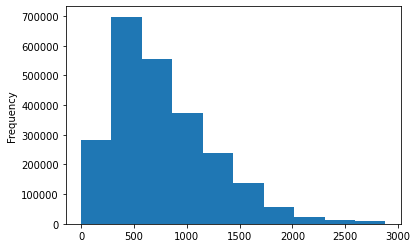

In [113]:
data_2019_all[data_2019_all['Trip  Duration'] <= 60*24*2]['Trip  Duration'].plot(kind='hist')

In [105]:
max(data_2019_all['Trip  Duration'].to_numpy()//(3600*24))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in floor_divide
  """Entry point for launching an IPython kernel.


143.0

In [ ]:
# Total number of trips taken
# Number of bikes
# Number of stations
# Average daily uses per bike
# Average daily trips per resident (of the coverage area)
# Trip duration

# Bike usage trend in the past years 
    # Bar plots (year pattern, 2017-2020): number of stations
    # Bar plots (year pattern, 2019 and 2020): number of bikes
    # Bar plots (year pattern, 2017-2020): number of trips
    # Box plots (year pattern, 2017-2020): trip duration in minutes
    # Clustered horizontal bar plots (year pattern, for 2017-2020): x=% users for bikeshare (member or casual), y=4x2 clusters for each year
# Bike usage patterns within a year
    # Box plots (month pattern, for 2017-2020, each containing 4 data points): x=Jan/Feb/.../Dec, y=number of trips --> may also show some summer/winter patterns
    # Line plots, 2 lines (month pattern, for 2019 and 2020 separately, each containing 12 data points): x=Jan/Feb/.../Dec, y=average daily uses per bike --> may show some summer/winter patterns
    # Histograms/Frequencies, 12 subplots (month pattern, for 2019 separately): x=trip duration, for each month <-- before doing this, check box plot to eliminate outliers (likely after 24 hours)
# Bike usage patterns within a week 
    # Box plots (week pattern, for 2017-2020, each containing 52x4=108 data points): x=Mon/Tue/.../Sun, y=number of trips
    # Box plots (week pattern, for 2019, containing 52 data points): x=Mon/Tue/.../Sun, y=number of trips
# Bike usage patterns within a weekday/weekend/holiday 
    # Box plots (hour pattern, for 2017-2020, each containing 52x4 data points): x=departure hour (0-23), y=number of trips
    # Line plots (hour pattern, for 2019): x=departure hour, y=number of trips (% in this hour on an average weekday/weekend/holiday), 3 lines -- 1 for weekday (Mon-Fri), 1 for weekend, 1 for holiday --> may show user behaviours on weekday/weekend/holiday
    
# Bike usage patterns under extreme weather conditions 
    # Summer / Winter
    
# 2. Location of bike sharing stations with the population distribution (map diagram)



# https://www.sciencedirect.com/science/article/pii/S0966692321000247
    # spatial patterns of trips, temporal rhythms, trip frequency, trip purposes
    # age, gender, ethnic differences, wealth, home location
# Look at start or end?

In [76]:
print(data_2019_all.shape)
print(data_2019_all.dtypes)

(2439517, 21)
Trip Id                        int64
Trip  Duration               float64
Start Station Id               int64
Start Time            datetime64[ns]
Start Station Name            string
End Station Id               float64
End Time              datetime64[ns]
End Station Name              string
Bike Id                        int64
User Type                     string
Start Year                     int64
Start Month                    int64
Start Hour                     int64
Start Day of Week              int64
Start Holiday                  int64
End Year                       int64
End Month                      int64
End Hour                       int64
End Day of Week                int64
End Holiday                    int64
Usage Duration                 int64
dtype: object


In [77]:
print(len(data_2019_all['Bike Id'].unique()))

4901


In [73]:
print(len(data_2019_all['Start Station Name'].unique()), len(data_2019_all['End Station Name'].unique()))
print(len(data_2019_all['Start Station Id'].unique()), len(data_2019_all['Start Station Id'].unique()))

469 469
469 469


In [ ]:
data_2019_all = 

data_2019_all.plot(kind='box', figsize=(12, 8))

plt.title('Box Plots')
plt.ylabel('')

plt.show()